In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
original_dataset_dir = r"C:\\Users\\Lenovo\\Downloads\\Digits\\dataset"

In [ ]:
base_dir = r'C:\\Users\\Lenovo\\Downloads\\Digits\\dataset-Split'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
for category in ['0', '1','2','3','4','5','6','7','8','9']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

In [ ]:
import numpy as np
import shutil

In [ ]:
import os
import shutil
import numpy as np


# Define the path to your dataset
original_dataset_dir = r'C:\\Users\\Lenovo\\Downloads\\Digits\\dataset'  # Change to the path where your digit images are located
base_dir = r'C:\\Users\\Lenovo\\Downloads\\Digits\\dataset-Split'  # Path where the split dataset will be stored


# Directories for training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create subdirectories for each class (digits 0-9) in each split directory
for digit in range(10):  # Digits from 0 to 9
    os.makedirs(os.path.join(train_dir, str(digit)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(digit)), exist_ok=True)
    os.makedirs(os.path.join(test_dir, str(digit)), exist_ok=True)

# Function to split and copy files
def split_data(source_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15), seed=42):
    np.random.seed(seed)
    filenames = os.listdir(source_dir)
    filenames = [f for f in filenames if os.path.isfile(os.path.join(source_dir, f))]
    
    # Shuffle filenames
    np.random.shuffle(filenames)
    
    # Calculate split sizes
    train_size = int(len(filenames) * split_ratio[0])
    val_size = int(len(filenames) * split_ratio[1])
    
    # Split filenames
    train_filenames = filenames[:train_size]
    val_filenames = filenames[train_size:train_size + val_size]
    test_filenames = filenames[train_size + val_size:]
    
    # Copy files to the respective directories
    for filename in train_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(train_dir, filename))
    for filename in val_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(val_dir, filename))
    for filename in test_filenames:
        shutil.copy(os.path.join(source_dir, filename), os.path.join(test_dir, filename))

# Split data for each digit (0-9)
for digit in range(10):
    digit_dir = os.path.join(original_dataset_dir, str(digit))  # Source directory for the digit
    split_data(digit_dir, os.path.join(train_dir, str(digit)), os.path.join(val_dir, str(digit)), os.path.join(test_dir, str(digit)))

print("Digit dataset split and copied successfully.")


Digit dataset split and copied successfully.


In [ ]:
train_dir=r"C:\Users\Lenovo\Downloads\Digits\dataset-Split\train"
validation_dir=r"C:\Users\Lenovo\Downloads\Digits\dataset-Split\val"
test_dir=r"C:\Users\Lenovo\Downloads\Digits\dataset-Split\test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
	train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical"
)
validation_generator=test_datagen.flow_from_directory(
	validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="categorical"
)

Found 10365 images belonging to 10 classes.
Found 2217 images belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
model=models.Sequential()

In [ ]:
# Define a simple CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

c:\Users\Lenovo\Desktop\ML\sklearn-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
total_validation_samples = validation_generator.samples
total_validation_samples

2217

In [ ]:
batch_size = validation_generator.batch_size
batch_size

20

In [ ]:
validation_steps = np.ceil(total_validation_samples / batch_size).astype(int)
validation_steps

111

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

his_ = model.fit(
    train_generator,
    steps_per_epoch=140,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=162,
    callbacks=[early_stopping]
)


Epoch 1/20


c:\Users\Lenovo\Desktop\ML\sklearn-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 117s 816ms/step - accuracy: 0.2785 - loss: 2.2496 - val_accuracy: 0.6748 - val_loss: 1.0166
Epoch 2/20


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


140/140 ━━━━━━━━━━━━━━━━━━━━ 94s 671ms/step - accuracy: 0.7243 - loss: 0.9413 - val_accuracy: 0.7803 - val_loss: 0.7143
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 83s 596ms/step - accuracy: 0.8168 - loss: 0.6314 - val_accuracy: 0.8124 - val_loss: 0.5963
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 62s 443ms/step - accuracy: 0.8630 - loss: 0.4555 - val_accuracy: 0.8272 - val_loss: 0.5487
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 81s 579ms/step - accuracy: 0.8915 - loss: 0.3823 - val_accuracy: 0.8615 - val_loss: 0.4740
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 83s 596ms/step - accuracy: 0.9134 - loss: 0.2947 - val_accuracy: 0.8530 - val_loss: 0.4945
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 84s 602ms/step - accuracy: 0.9327 - loss: 0.2183 - val_accuracy: 0.8764 - val_loss: 0.4017
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 472ms/step - accuracy: 0.9542 - loss: 0.1610 - val_accuracy: 0.8931 - val_loss: 0.3652
Epoch 9/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 87s 623ms/step - accuracy: 0.9589 - loss: 0.1279 - val

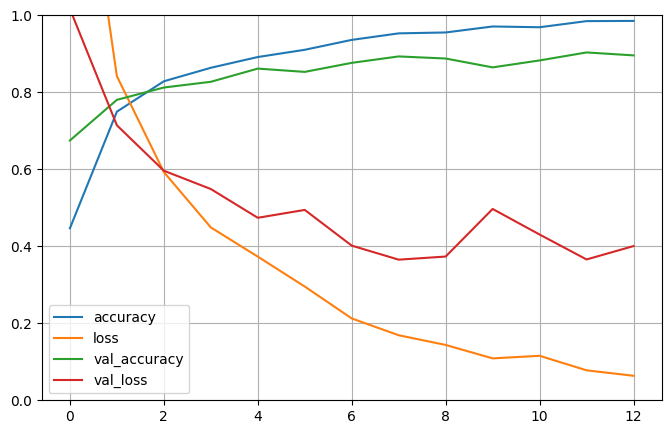

In [ ]:
pd.DataFrame(his_.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("handwritting.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


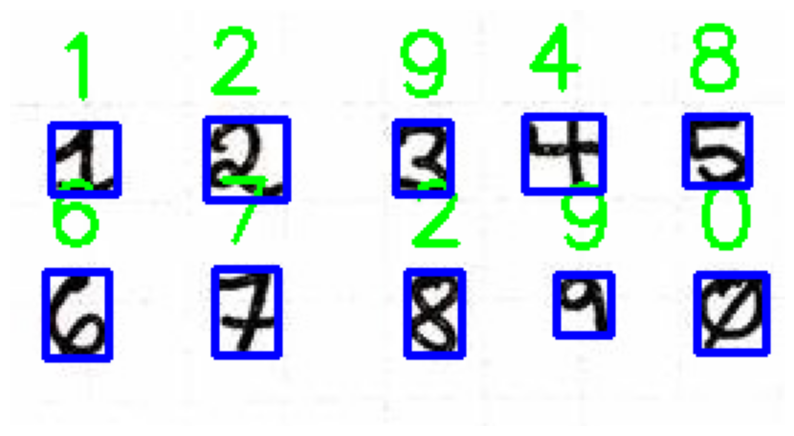

Predicted digits: [0, 1, 2, 2, 4, 6, 7, 8, 9, 9]


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('handwritting.h5')

# Load the test image (replace with the path to your image)
image_path = r'C:\Users\Lenovo\Pictures\count11.jpeg'  # Update with your image path
image = cv2.imread(image_path)

# Convert to grayscale (since digits are black on white background)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to make the digits stand out
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the digits
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store predicted digits
predicted_digits = []

# Loop through each contour found (each should correspond to a digit)
for contour in contours:
    # Get the bounding box around each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract the region of interest (the digit)
    digit = gray[y:y+h, x:x+w]
    
    # Resize the digit image to 150x150 pixels (as required by the model)
    digit_resized = cv2.resize(digit, (150, 150))
    
    # Convert to 3-channel RGB (the model expects 3 channels)
    digit_resized = cv2.cvtColor(digit_resized, cv2.COLOR_GRAY2RGB)
    
    # Normalize the image
    digit_resized = digit_resized / 255.0
    
    # Reshape the image to (1, 150, 150, 3) as expected by the model
    digit_resized = np.reshape(digit_resized, (1, 150, 150, 3))
    
    # Predict the digit using the CNN model
    prediction = model.predict(digit_resized)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Append the predicted digit to the list
    predicted_digits.append(predicted_class[0])
    
    # Draw the predicted digit on the image (optional, for visualization)
    cv2.putText(image, str(predicted_class[0]), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with predicted digits
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the predicted digits in the image
print("Predicted digits:", sorted(predicted_digits))
